In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

Data size: 12

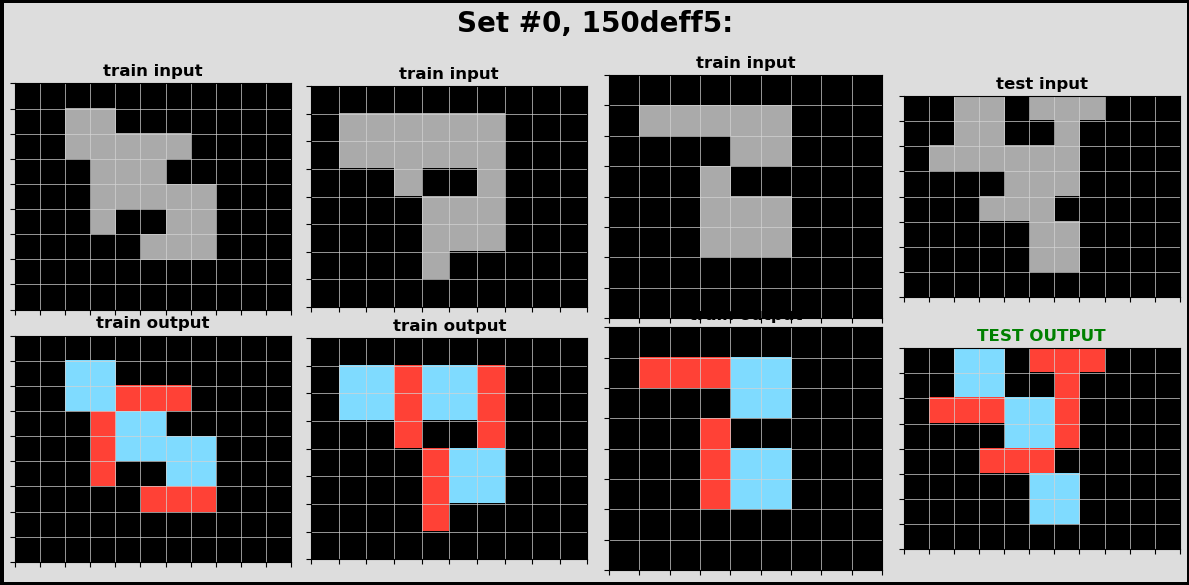

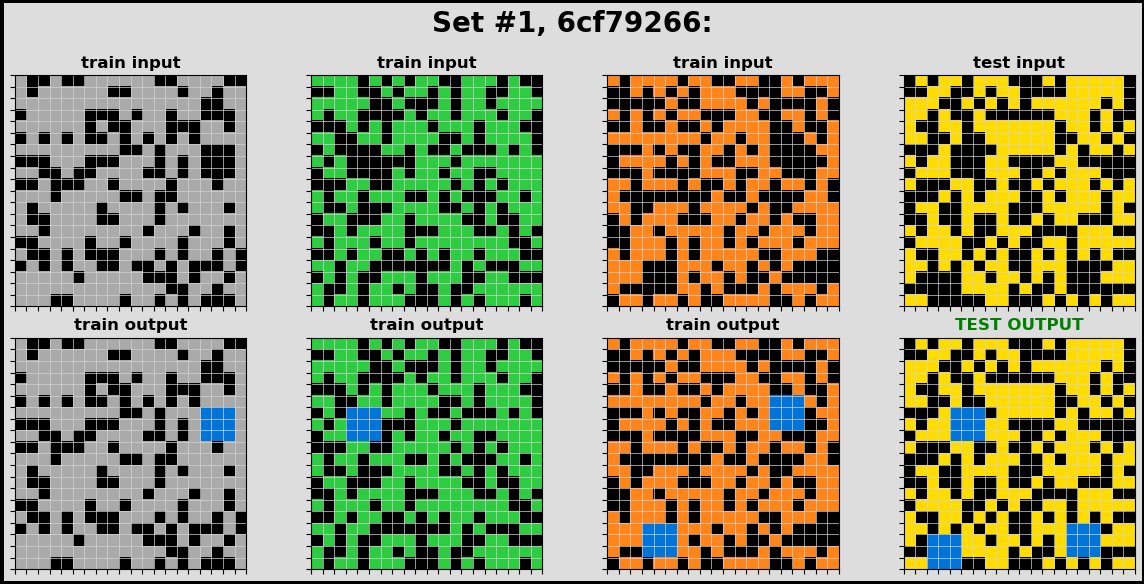

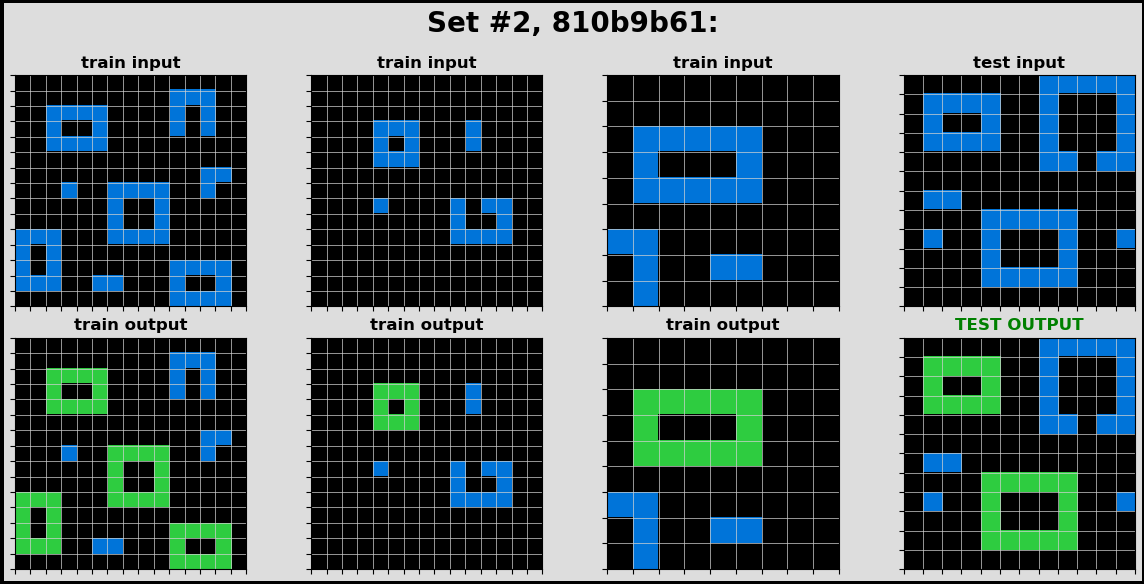

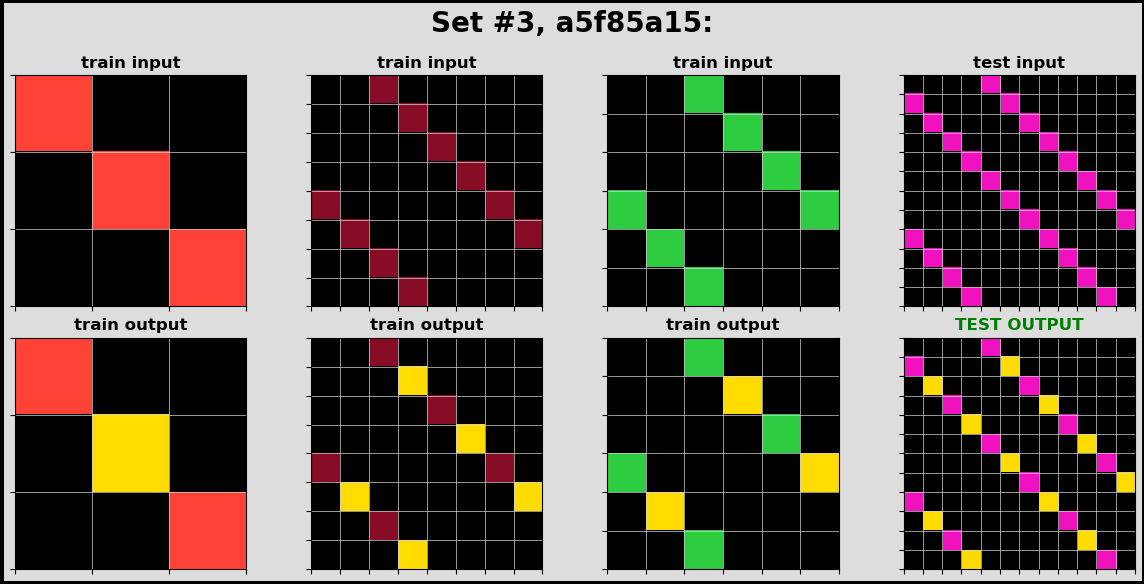

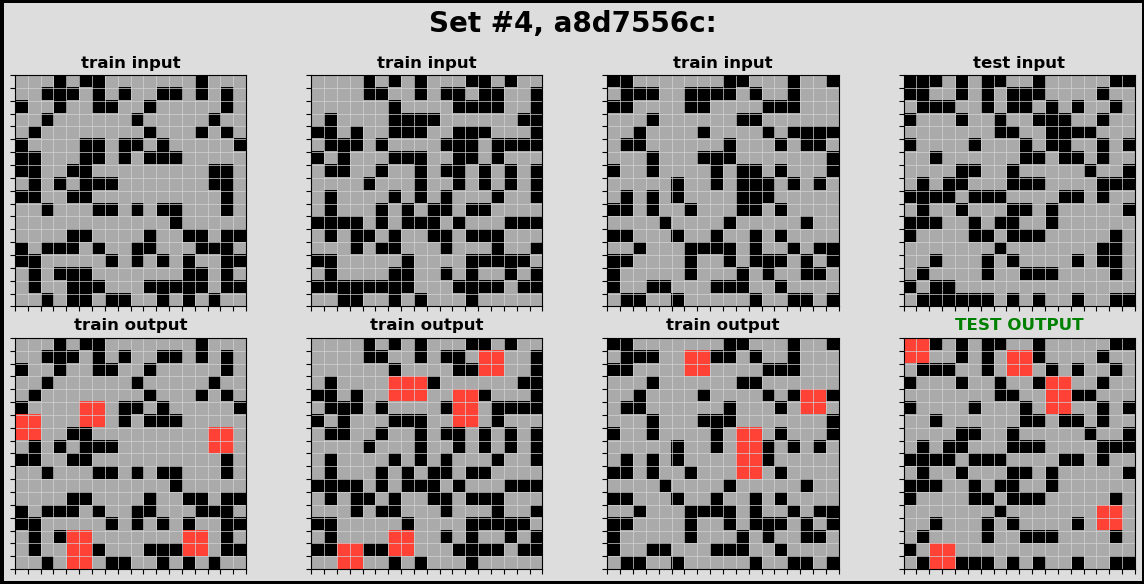

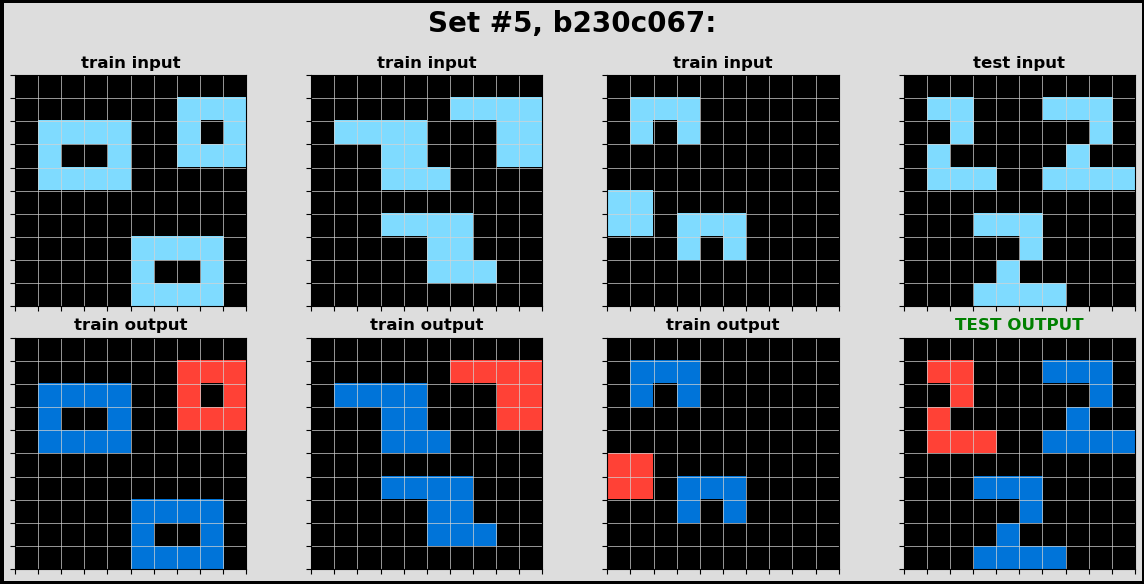

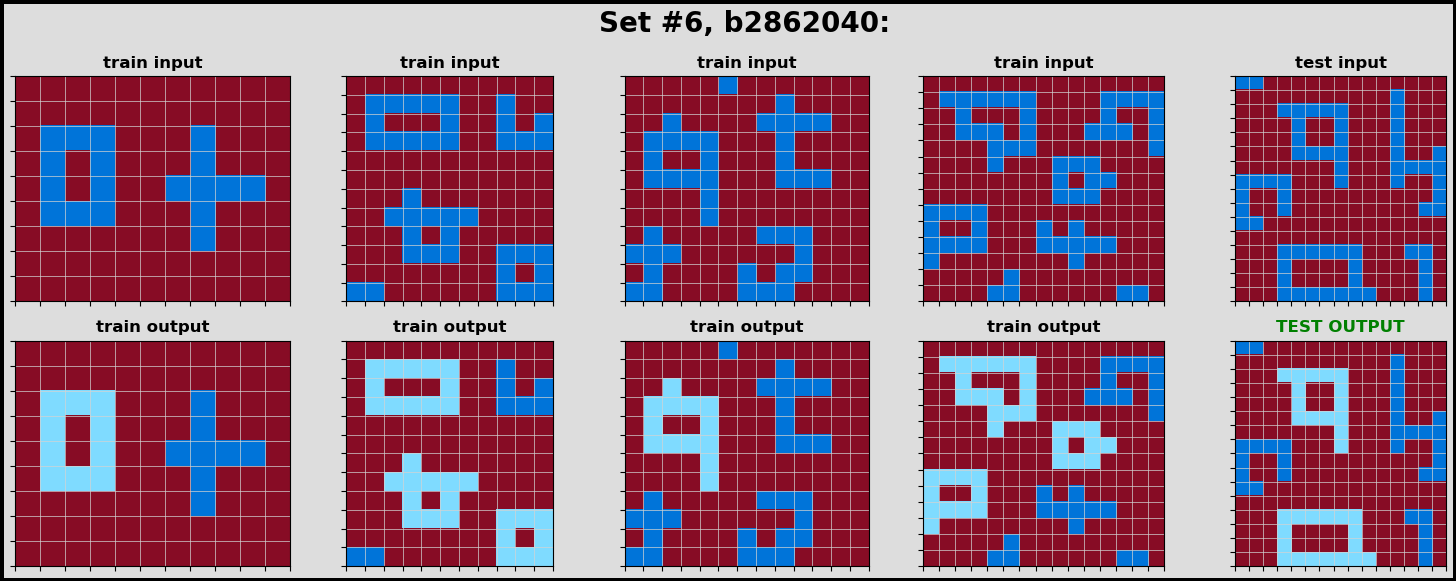

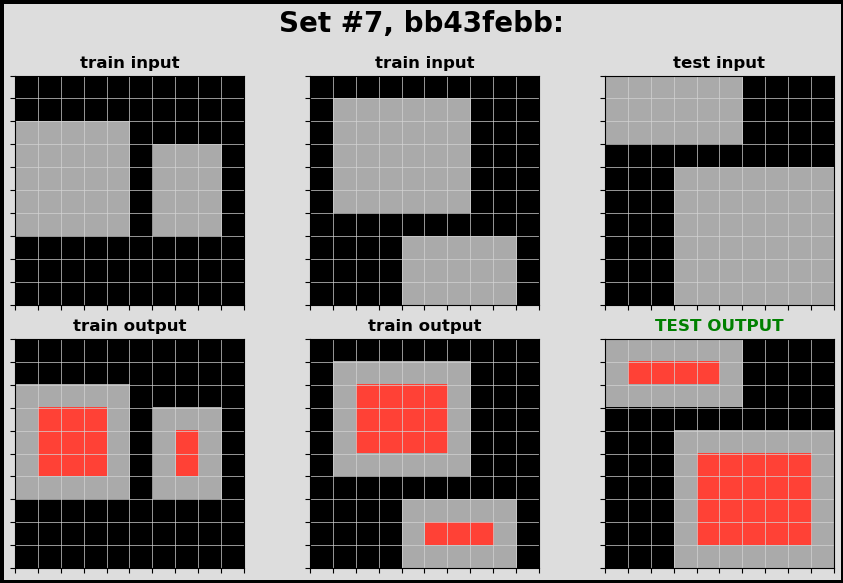

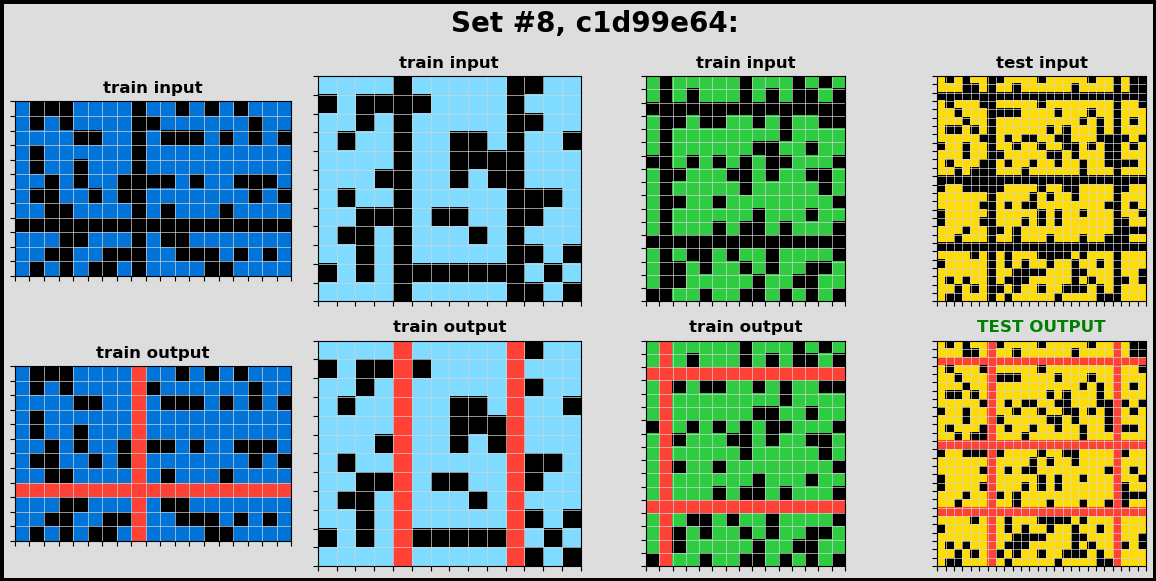

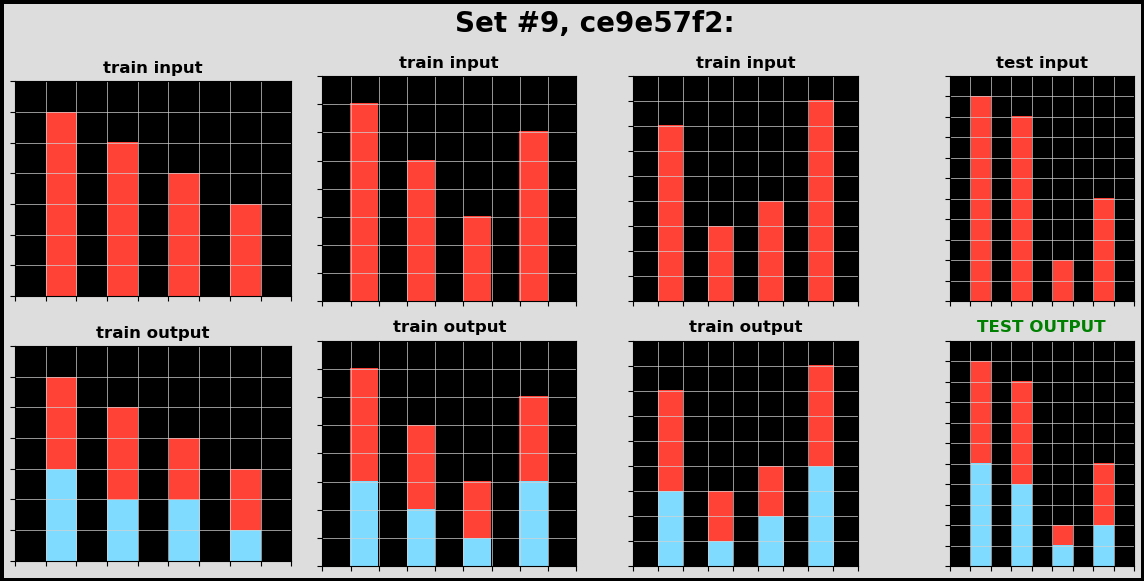

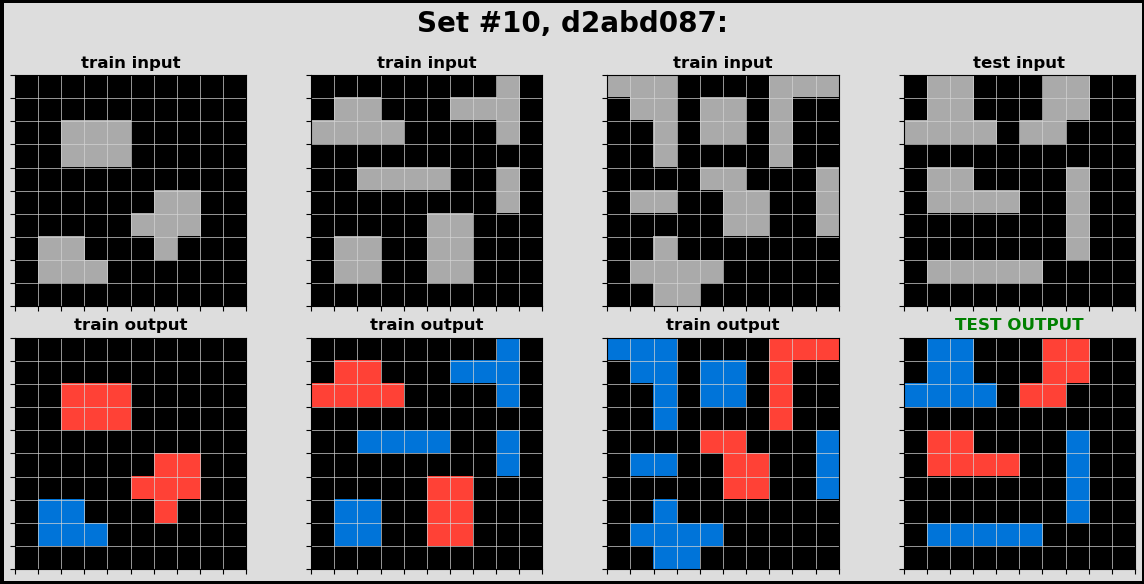

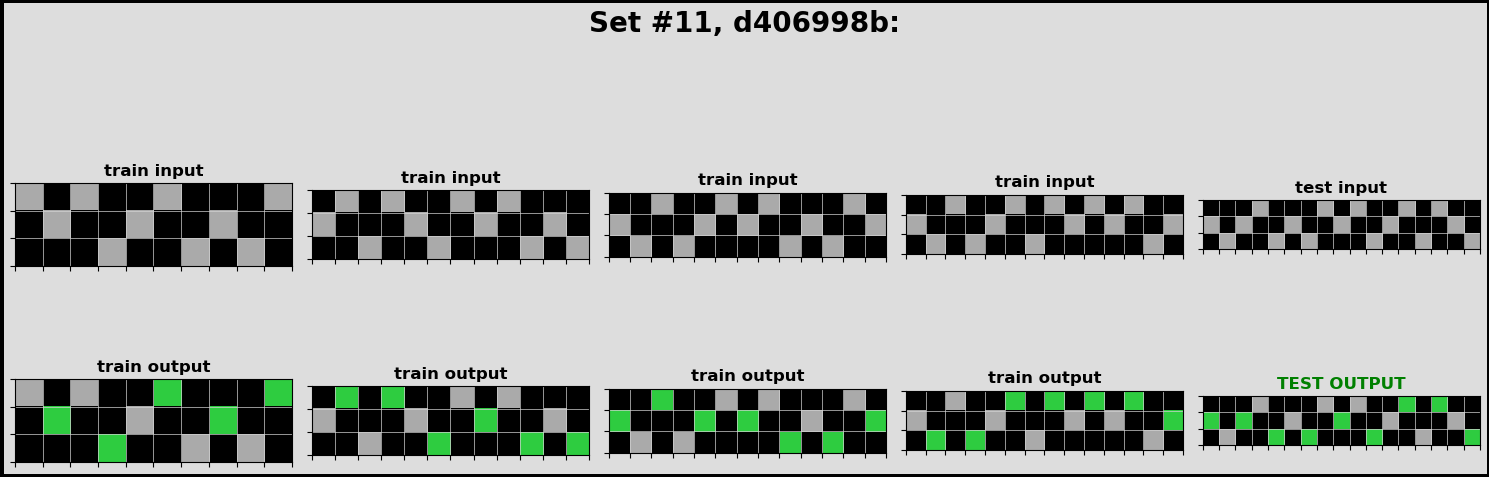

In [3]:
from data import ARCDataset
from rich import print
from utils.visualize import plot_task
from classify import ARCDataClassifier

base_path = '../../data/arc-prize-2024/'

# Reading files
challenges = base_path + 'arc-agi_training_challenges.json'
solutions = base_path + 'arc-agi_training_solutions.json'
# challenges = base_path + 'arc-agi_evaluation_challenges.json'
# solutions = base_path + 'arc-agi_evaluation_solutions.json'

filter_funcs = (
    ARCDataClassifier.is_same_shape_f(True),
    ARCDataClassifier.is_n_m_colored_in_out_f(2, 3),
    ARCDataClassifier.is_dominent_color_stable_f(True),
    # ARCDataClassifier.are_input_output_similar_f(0.9)
)

# Example usage
dataset_train = ARCDataset(challenges, solutions, train=True, one_hot=False, filter_funcs=filter_funcs)
dataset_test = ARCDataset(challenges, solutions, train=False, one_hot=False, filter_funcs=filter_funcs)
print(f'Data size: {len(dataset_train)}')

# Visualize a task
for index in range(len(dataset_train)):
    # xs = [task[0] for task in dataset_train[index]]
    # ys = [task[1] for task in dataset_train[index]]
    plot_task(dataset_train, dataset_test, index)